In [12]:

import tensorflow as tf
from tensorflow import keras
from keras.api.models import Sequential
from keras.api.layers import Dense, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, PercentFormatter

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data_tp1', header=None)
X = df.drop(0, axis=1) / 255
y = tf.one_hot(df[0], depth=10)

### Model

In [3]:
def neural_net(X, y, learning_rate = 0.01, epochs = 10, batch_size = 10, hidden_layer_units = 25):
    
    model = Sequential([
        Input(shape=(784,)),
        Dense(hidden_layer_units, activation='sigmoid'),
        Dense(10, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    
    return history

### (Full Batch) Gradient Descent

In [4]:
learning_rate = 0.5
batch_size = len(y)
epochs = 50

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history


{'accuracy': [0.11760000139474869,
  0.1671999990940094,
  0.20360000431537628,
  0.3203999996185303,
  0.4339999854564667,
  0.5166000127792358,
  0.5590000152587891,
  0.5878000259399414,
  0.6047999858856201,
  0.6168000102043152,
  0.6276000142097473,
  0.6381999850273132,
  0.6488000154495239,
  0.656000018119812,
  0.6647999882698059,
  0.6714000105857849,
  0.6790000200271606,
  0.6855999827384949,
  0.6895999908447266,
  0.694599986076355,
  0.6988000273704529,
  0.7045999765396118,
  0.7081999778747559,
  0.7131999731063843,
  0.7184000015258789,
  0.723800003528595,
  0.7264000177383423,
  0.7311999797821045,
  0.7346000075340271,
  0.7365999817848206,
  0.7382000088691711,
  0.7408000230789185,
  0.7445999979972839,
  0.746399998664856,
  0.7495999932289124,
  0.7544000148773193,
  0.7567999958992004,
  0.760200023651123,
  0.7649999856948853,
  0.7674000263214111,
  0.7717999815940857,
  0.7748000025749207,
  0.7781999707221985,
  0.7807999849319458,
  0.7821999788284302,
 

### Stochastic Gradient Descent

In [5]:
learning_rate = 0.5
epochs = 10
batch_size = 1

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

{'accuracy': [0.6191999912261963,
  0.746399998664856,
  0.767799973487854,
  0.8004000186920166,
  0.8100000023841858,
  0.8349999785423279,
  0.8343999981880188,
  0.849399983882904,
  0.8593999743461609,
  0.8730000257492065],
 'loss': [1.2961252927780151,
  0.9633371233940125,
  0.8302444219589233,
  0.7371028065681458,
  0.6817706823348999,
  0.6136673092842102,
  0.5968469381332397,
  0.5426123738288879,
  0.5005316138267517,
  0.4352063834667206]}

### Mini-Batch Gradient Descent

In [6]:
learning_rate = 0.1
epochs = 10
batch_size = 10

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

{'accuracy': [0.7002000212669373,
  0.8628000020980835,
  0.8881999850273132,
  0.9010000228881836,
  0.9125999808311462,
  0.9174000024795532,
  0.9264000058174133,
  0.9330000281333923,
  0.9358000159263611,
  0.9434000253677368],
 'loss': [1.1915119886398315,
  0.5475403666496277,
  0.41521507501602173,
  0.35367730259895325,
  0.3116339445114136,
  0.278861939907074,
  0.2569270431995392,
  0.23744522035121918,
  0.22104527056217194,
  0.20384104549884796]}

In [7]:
learning_rate = 0.1
epochs = 10
batch_size = 50

neural_net(X, y, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, hidden_layer_units = 25).history

{'accuracy': [0.5072000026702881,
  0.734000027179718,
  0.7940000295639038,
  0.8253999948501587,
  0.8398000001907349,
  0.8546000123023987,
  0.8629999756813049,
  0.8704000115394592,
  0.8759999871253967,
  0.8802000284194946],
 'loss': [1.9510706663131714,
  1.3750078678131104,
  1.0348765850067139,
  0.8382978439331055,
  0.7161561250686646,
  0.633416473865509,
  0.5742870569229126,
  0.5288527607917786,
  0.494258850812912,
  0.46584048867225647]}

### Differences between hidden layer units

In [8]:
# Different Gradient Descents
# GD               -> batch_size = len(y)
GD = len(y)

# SGD              -> batch_size = 1
SGD = 1

# Mini-Batch GD 10 -> batch_size = 10
MBGD10 = 10

# Mini-Batch GD 50 -> batch_size = 50
MBGD50 = 50

# batch_sizes
batch_sizes = [GD, SGD, MBGD10, MBGD50]

# Different learning rates
learning_rates = [0.5, 1.0, 10.0]

# Different number of hidden layers
hidden_layer_units = [25, 50, 100]


h = []

for batch_size in batch_sizes:
    l = []
    for learning_rate in learning_rates:
        u = []
        for hidden_layer_unit in hidden_layer_units:
            res = neural_net(X, y, learning_rate = learning_rate, epochs = 50, batch_size = batch_size, hidden_layer_units = hidden_layer_unit).history
            u.append(res)
        l.append(u)
    h.append(l)

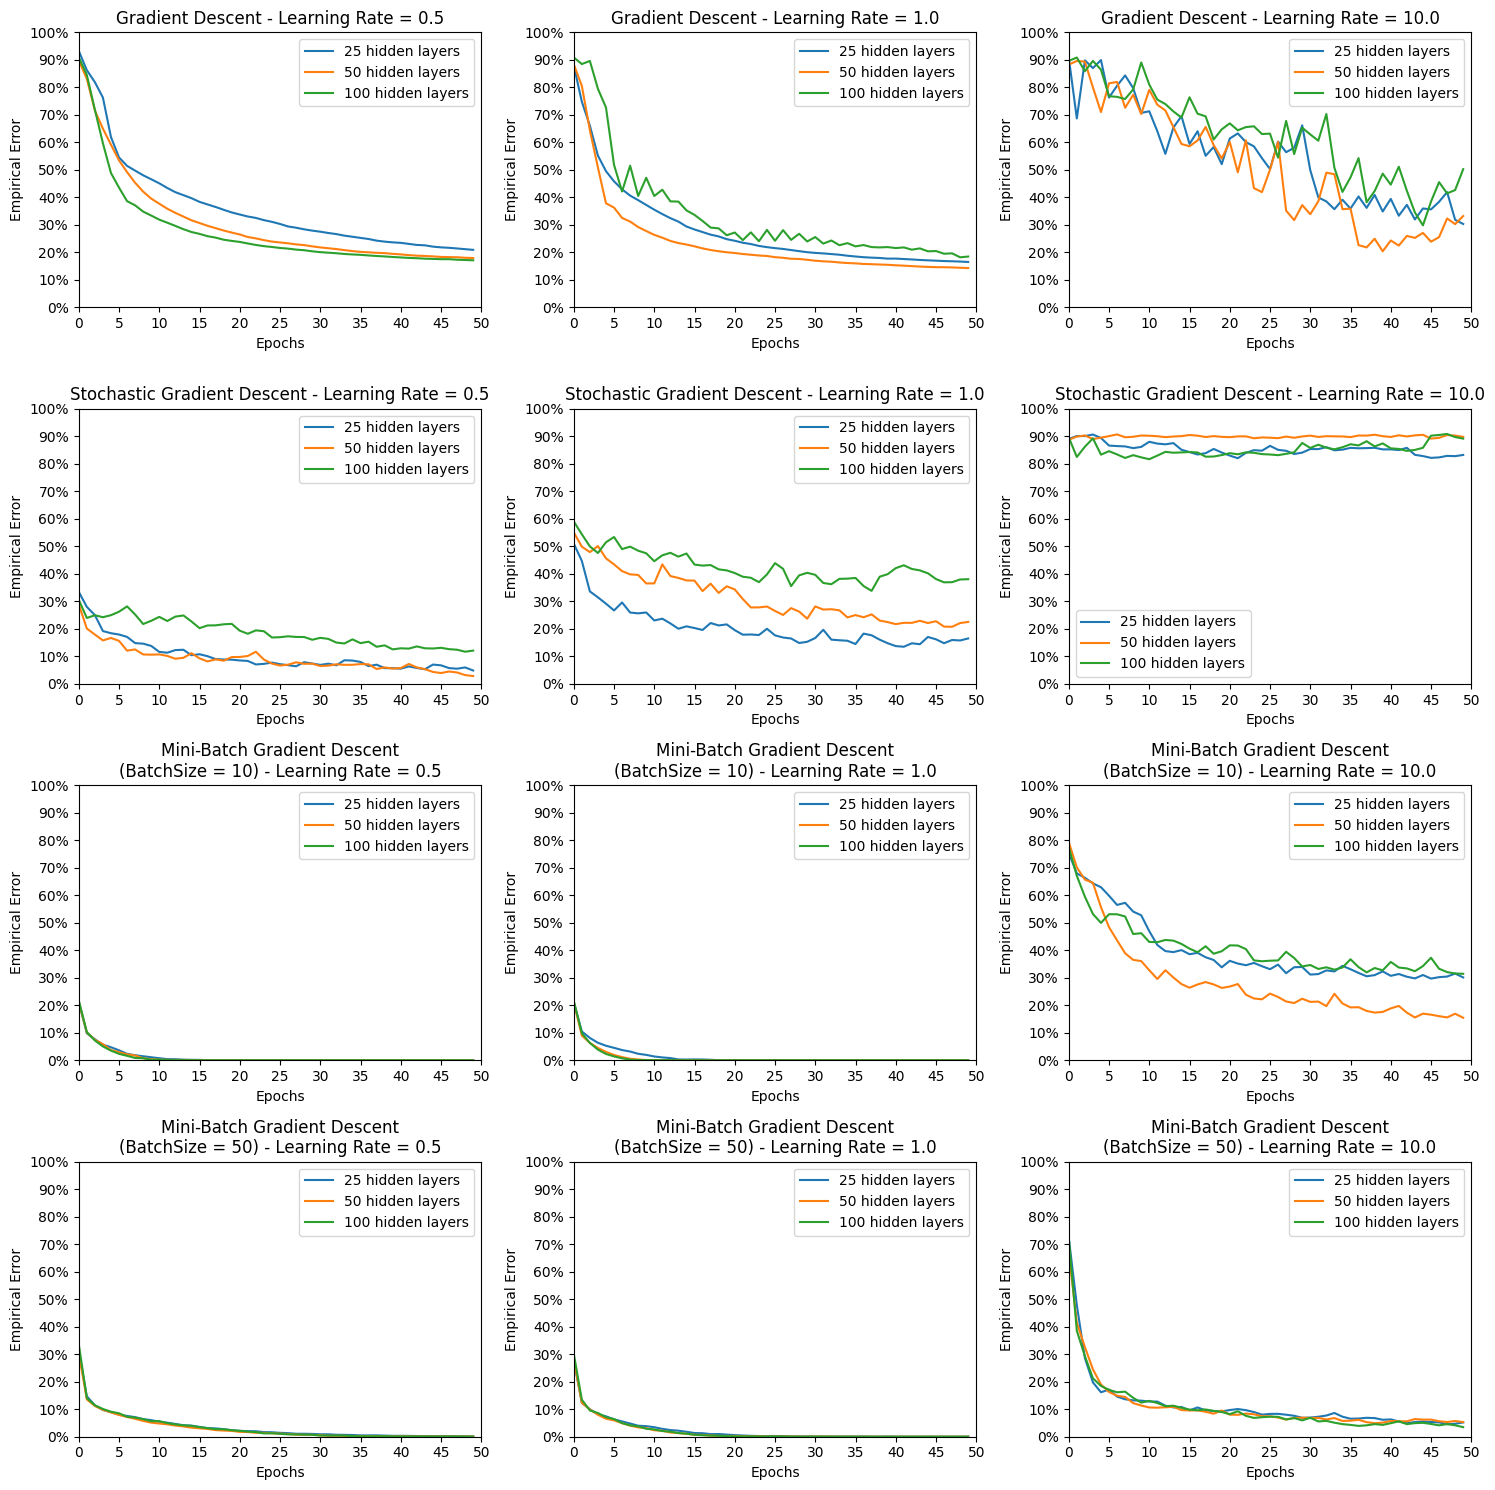

In [13]:
fig, axes = plt.subplots(4,3, figsize=(15,15))

algorithms = ["Gradient Descent", "Stochastic Gradient Descent", "Mini-Batch Gradient Descent\n(BatchSize = 10)", "Mini-Batch Gradient Descent\n(BatchSize = 50)"]

# for each GD algorithm
for i, gd_algorithm in enumerate(algorithms):
    
    # for each learning rate
    for j, learning_rate in enumerate(learning_rates):
        
        axes[i, j].plot([(1 - k)*100 for k in h[i][j][0]["accuracy"]], label='25 hidden layers')
        axes[i, j].plot([(1 - k)*100 for k in h[i][j][1]["accuracy"]], label='50 hidden layers')
        axes[i, j].plot([(1 - k)*100 for k in h[i][j][2]["accuracy"]], label='100 hidden layers')
        axes[i, j].legend()
        
        axes[i, j].set_title(f"{gd_algorithm} - Learning Rate = {learning_rate}")
        axes[i, j].set_xlabel("Epochs")
        axes[i, j].set_ylabel("Empirical Error")
        axes[i, j].set_xlim(0, 50)
        axes[i, j].set_ylim(0, 100)
        axes[i, j].xaxis.set_major_locator(MaxNLocator(integer=True))
        axes[i, j].xaxis.set_major_locator(plt.MultipleLocator(5))
        axes[i, j].yaxis.set_major_locator(plt.MultipleLocator(10))   
        axes[i, j].yaxis.set_major_formatter(PercentFormatter(xmax=100))   
        
        
plt.tight_layout()
plt.show()

### Discussão sobre os resultados obtidos

#### Diferentes algortimos de gradiente descendente
- As propriedades de cada um dos algoritmos de gradiente descendente podem ser observados nas amostras 

#### Variação de unidades da camada oculta
- Modelos que apresentam uma maior quantidade de unidades na camada oculta apresentam uma maior capacidade, uma vez que possuem uma maior quantidade de parâmetros a serem tunados, podendo portanto representar modelos mais complexos. No entanto, isso pode levar a overfitting, onde o modelo aprende muito bem a classificar o conjunto de treinamento a ponto de também aprender o viés da amostra.
- Além disso, em casos onde a taxa de aprendizado também está alta, as atualizações dos pesos da rede neural pode ser superestimada. Como a capacidade do modelo é maior, o erro empirico acaba sendo também maior para redes com uma maior quantidade de unidades na camada oculta.


#### Variação das Taxas de Aprendizados
- Taxas de aprendizado diferentes foram exploradas durante a implementação do trabalho prático, sendo elas de 0.5, 1 e 10
- Essa variação das taxas tornou possível observar uma variação na convergência do modelo
- É de conhecimento geral que taxas muito pequenas podem levar a uma demora na convergência do modelo, uma vez que passos em direção aos gradientes calculados são pequenos
- Da mesma maneira, taxas muito grandes podem impedir o modelo de alcançar o mínimo local, resultado em uma divergência em direção oposta
- Não existe um algoritmo para definir a priori qual são as taxas ideais para treinar um modelo, sendo essa descoberta obtida de maneira experimental
- Essas características são melhor observadas na imagem a seguir

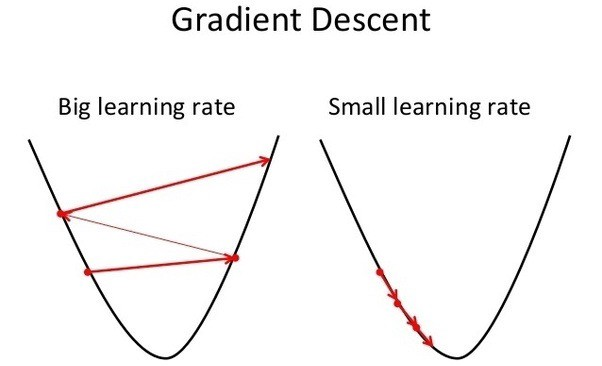

- Nos resultados obtidos das taxas de aprendizado, é possível observar que a taxa de 0.5 foi satisfatória na maioria das instâncias treinadas, isso considerando apenas o erro empírico.
- A taxa de aprendizado de 1 foi satisfatória no treinamento de alguns modelos (MiniBatch10 e MiniBatch50, erros empíricos menores do que 10% após 50 epochs) e insatisfatória no treinamento de outros (GD e SGD, erros empíricos atingindo até 40% em algumas instâncias)
- Já com a taxa de apredizado de 10, apenas o modelo MiniBatch50 (batch_size = 50) apresentou um erro empíricos razoável (aproximadamente 10% após 50 epochs), enquanto nos outros modelos foi observado uma variação maior do erro empírico ao decorrer das diferentes epochs, além de em alguns casos a presença de erros empíricos muito altos. Isso traduz bem o que é observado na imagem acima, onde uma taxa muito grande leva o modelo a se afastar do erro mínimo, as vezes convergindo para um valor de erro empírico alto